### 1. Write a Python code snippet to load a CSV dataset using Pandas and display the first five rows of theDataFrame.

* Import the Pandas Library
Below are the methods.
* print() : This method will be used to print all the rows
* head() : This method will be uses to return first 5 rows of the dataframe

In [216]:
# 1. Import the Pandas library

import pandas as pd

# 2. Load the data.csv file
df = pd.read_csv('tips.csv')

# 3. Visualise the data
# Display the first few rows of the DataFrame
print("First 5 rows")
print("--------------")
print(df.head())


First 5 rows
--------------
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### 2. Implement a function in Python to detect missing values in a DataFrame and count the total number of
### missing values.

In [219]:
import pandas as pd

# Step 1: Define the function to detect and count missing values
def count_missing_values(df):
    """
    Detects missing values in the DataFrame and counts the total number of missing values.

    Args:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.Series: A Series containing the count of missing values for each column.
    int: The total number of missing values in the DataFrame.
    """
    # Step 2: Detect missing values (NaN)
    missing_per_column = df.isnull().sum()

    # Step 3: Count total missing values
    total_missing = missing_per_column.sum()

    return missing_per_column, total_missing


In [221]:
# Loading a csv file and checking missing values per columns and total missing values in Dataframe
heart_df = pd.read_csv("bigmart.csv")

print(heart_df.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [223]:

# Step 4: Call the function and display the result
missing_per_column, total_missing = count_missing_values(heart_df)

print("Missing values per column:")
print(missing_per_column)
print("\nTotal number of missing values:", total_missing)

Missing values per column:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Total number of missing values: 3873


In [225]:
# Loading a Dictionary and checking missing values per columns and total missing values in Dataframe

data = {
    'name': ['John', 'Alice', 'Bob', 'Carol'],
    'age': [20, 21, None, 23],
    'Studied': ['BTech', 'Msc', 'Phd', None]
}

df = pd.DataFrame(data)

print(df.head())

    name   age Studied
0   John  20.0   BTech
1  Alice  21.0     Msc
2    Bob   NaN     Phd
3  Carol  23.0    None


In [227]:
# Call the function and display the result
missing_per_column, total_missing = count_missing_values(df)

print("Missing values per column:")
print(missing_per_column)
print("\nTotal number of missing values:", total_missing)

Missing values per column:
name       0
age        1
Studied    1
dtype: int64

Total number of missing values: 2


### 3.Provide Python code to perform type conversion of a column in a DataFrame from categorical to numericaldata type.

#### To perform type conversion from categorical to numerical data in a DataFrame, you can use techniques such 
1. label encoding 
2. one-hot encoding

In [231]:
import pandas as pd

# Sample DataFrame with a categorical column
data = {'student': ['Joseph', 'Sekhar', 'Nitya', 'Priyanka'],
        'grade': ['A', 'B', 'A', 'C']}
df = pd.DataFrame(data)



In [233]:
# printing info of the dataframe by using info() method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   student  4 non-null      object
 1   grade    4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


##### Label Encoding: The astype('category').cat.codes converts the categorical column into numerical codes. 
##### Here, A is encoded as 0, B as 1, and C as 2.

In [236]:
# Step 1: Convert the 'grade' column from categorical to numerical using label encoding

# converting type of columns to 'category'
df['grade'] = df['grade'].astype('category')
# Assigning numerical values and storing in another column using pandas

df['grade_encoded'] = df['grade'].cat.codes

# Display the DataFrame
print(df)

    student grade  grade_encoded
0    Joseph     A              0
1    Sekhar     B              1
2     Nitya     A              0
3  Priyanka     C              2


##### pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]
##### Convert categorical variable into dummy/indicator variables.

##### Each variable is converted in as many 0/1 variables as there are different values. 
##### Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

In [239]:
# Step 1: Using Hot encoding get_dummies method to convert the 'grade' column from categorical to numerical using one-hot encoding
df_one_hot = pd.get_dummies(df, columns=['grade'], dtype=int)
# Display the DataFrame
print(df_one_hot)

    student  grade_encoded  grade_A  grade_B  grade_C
0    Joseph              0        1        0        0
1    Sekhar              1        0        1        0
2     Nitya              0        1        0        0
3  Priyanka              2        0        0        1


### 4. Write Python code to apply MinMaxScaler from sklearn to scale a numerical feature in a DataFrame.

In [242]:
import pandas as pd

# Step 1: Create a sample DataFrame by import diabetes dataset

diab_df= pd.read_csv("diabetes.csv")



In [244]:
# print info
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [246]:
# import MinMaxScaler from scikit learn preprocessing
from sklearn.preprocessing import MinMaxScaler

# Using numerical features Insulin and Glucose for calculating the MinMax scaler
data_to_scale = diab_df[['Insulin', 'Glucose']]
# Step 2: Initialize the MinMaxScaler (default range is 0 to 1)
scaler = MinMaxScaler()

# Step 3: Fit the scaler on the 'age' column and transform the data
data_min_max_scaled = scaler.fit_transform(data_to_scale)

# Display the DataFrame with the scaled 'age' feature
df_min_max_scaled = pd.DataFrame(data_min_max_scaled, columns =['Insulin_min_max_scaled', 'Glucose_min_max_scaled'])

In [248]:
# Printing the dataframe
print("Dataframe with MinMax scaled")
print("__________________________")
df_min_max_scaled.head()

Dataframe with MinMax scaled
__________________________


,Insulin_min_max_scaled,Glucose_min_max_scaled
0,0.000000,0.743719
1,0.000000,0.427136
2,0.000000,0.919598
3,0.111111,0.447236
4,0.198582,0.688442


In [250]:
#  Create a sample DataFrame with a numerical feature
data = {'student': ['John', 'Alice', 'Bob', 'Carol'],
        'age': [20, 21, 22, 23]}
df = pd.DataFrame(data)


# Fit the scaler on the 'age' column and transform the data
df['age_scaled'] = scaler.fit_transform(df[['age']])

# Display the DataFrame with the scaled 'age' feature
print("Dataframe with MinMax scaled")
print("__________________________ \n")
print(df)

Dataframe with MinMax scaled
__________________________ 

  student  age  age_scaled
0    John   20    0.000000
1   Alice   21    0.333333
2     Bob   22    0.666667
3   Carol   23    1.000000


#### 5. Create a Python function to merge two DataFrames based on a common key column using Pandas' mergefunction

In [253]:
# Example dataframes with Enrollments and New grades data
df1 = pd.DataFrame({
    'student_id':[101,102,103,105],
    'course_id':[301,302,301,304],
    'branch':['CSE', 'DataScience', 'Artificial Intelligence','DataStructures'],
})

df2 = pd.DataFrame({
    'student_id':[101,102,103,105,106],
    'course_id':[301,302, 301,304,300],
     'branch':['CSE', 'DataScience', 'Blockchain', 'MachineLearning','DataStructures'],
} )


# Merge the datasets on the 'student_id' column with inner join
merged_df = pd.merge(df1, df2, on='student_id', how='inner')


# printing the Dataframe

print("Inner join merged df")
print("__________________\n")
print(merged_df)

Inner join merged df
__________________

   student_id  course_id_x                 branch_x  course_id_y  \
0         101          301                      CSE          301   
1         102          302              DataScience          302   
2         103          301  Artificial Intelligence          301   
3         105          304           DataStructures          304   

          branch_y  
0              CSE  
1      DataScience  
2       Blockchain  
3  MachineLearning  


#### 6. Write Python code to generate a histogram using Matplotlib for a given numerical column in a DataFrame
#### and interpret the results.

In [256]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a sample DataFrame with a numerical column
#data = {'student': ['John', 'Alice', 'Bob', 'Carol', 'David', 'Eva', 'Frank', 'Grace'],
 #       'age': [20, 21, 22, 23, 21, 24, 22, 25]}
df = pd.read_csv("diabetes.csv")


df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [258]:
# Showing the info to select relavant numerical column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


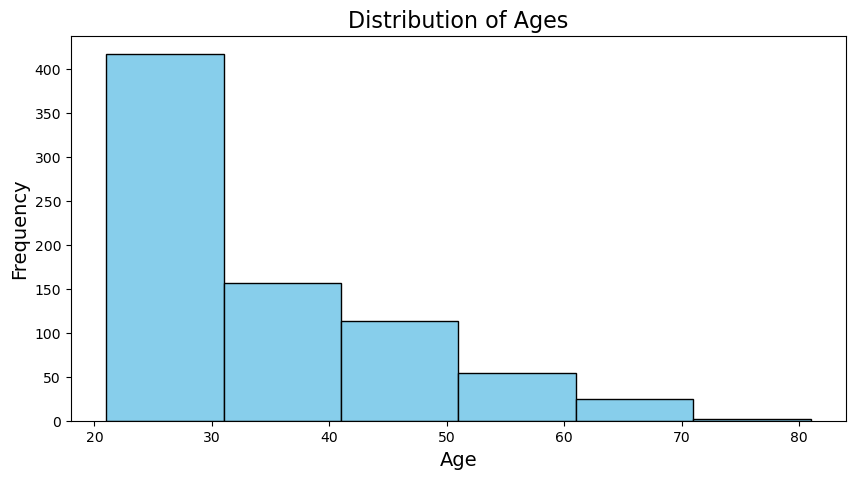

In [260]:
# Plot the histogram for the 'Age' column
plt.figure(figsize=(10, 5))  # Set the figure size
plt.hist(df['Age'], bins=6, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Step 4: Display the plot
plt.show()

Explanation: 
* DataFrame:
  We have a DataFrame df with a numerical column Age. 
* Histogram: 
 The plt.hist() function creates a histogram for the Age column. bins=6 specifies that the data should be divided into 6 bins (groups). 
color='skyblue' and edgecolor='black' are aesthetic settings to change the color of the bars and the edges.
* Labels: 
 We add a title, and labels for the x-axis (Age) and y-axis (Frequency).
 plt.show(): This displays the histogram.
 Output: The histogram would display bars representing the distribution of ages. Each bar's height corresponds to the number of patients    within the respective age group (or bin).

* Interpretation of the Results:
 The x-axis represents the ages, grouped into bins. Each bin corresponds to a range of ages (for example, ages 21–31, 31–41, etc.).
 The y-axis represents the frequency (i.e., how many patients fall within each bin). 
 If the histogram shows taller bars at certain ages, it indicates that more patients belong to that age group. 
* For example:

If the highest bar is for the age group 21-31, it indicates that most patients in the dataset are 21 or 31 years old. 
If the bars are evenly distributed, it shows that the ages are relatively spread out across the dataset.

In [264]:
!jupyter nbconvert --to webpdf --allow-chromium-download Final_Exam.ipynb

[NbConvertApp] Converting notebook Final_Exam.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 547163 bytes to Final_Exam.pdf
